Resources: https://note.nkmk.me/en/python-opencv-qrcode/

https://docs.opencv.org/4.x/d5/dae/tutorial_aruco_detection.html

https://pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/


ArUco code generator: https://chev.me/arucogen/

*First run imports (Google drive connection is optional, run if you want to use files from your drive), Base dictionary and Functions sections. In 'Test and Run' section, put the path to your file. You can find the path by choosing `Files` icon on the left side of the Colab interface, then `drive > MyDrive > go to your folder > tap on 3 dots and select Copy path`*. Paste that path in `image_path`variable as string.

# Imports

In [1]:
# Install OpenCV with ArUco support
!pip install opencv-contrib-python

import base64

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import output
import time

# For external file input
from google.colab import files

## Google drive connection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Base dictionary

In [3]:
# ArUco Dictionary Setup

# ARUCO_DICT - List of ArUco types that we want to check while scanning an image
'''
ARUCO_DICT = {
    "DICT_4X4_50": cv2.aruco.DICT_4X4_50,
    "DICT_4X4_100": cv2.aruco.DICT_4X4_100,
    "DICT_4X4_250": cv2.aruco.DICT_4X4_250,
    "DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
    "DICT_5X5_50": cv2.aruco.DICT_5X5_50,
    "DICT_5X5_100": cv2.aruco.DICT_5X5_100,
    "DICT_5X5_250": cv2.aruco.DICT_5X5_250,
    "DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
    "DICT_6X6_50": cv2.aruco.DICT_6X6_50,
    "DICT_6X6_100": cv2.aruco.DICT_6X6_100,
    "DICT_6X6_250": cv2.aruco.DICT_6X6_250,
    "DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
    "DICT_7X7_50": cv2.aruco.DICT_7X7_50,
    "DICT_7X7_100": cv2.aruco.DICT_7X7_100,
    "DICT_7X7_250": cv2.aruco.DICT_7X7_250,
    "DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
    "DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
}
'''

# Lets say that we can only scan 'ArUco Original' code
ARUCO_DICT = {"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL}

# Functions

In [18]:
'''
  Detect and draw ArUco code on image
'''
def detect_aruco_in_photo(image_path='photo.jpg', show_output = True):
  '''
    Args:
      image_path: absolute path to the image

    Returns:
      is_detected (bool): Does program found valid code
      code_name (str): Returns the name of detected code
      dict_id_center (dict): Dictionary with detected marker id with center coordinate
      image (numpy_array): Image in RGB format
  '''
  is_detected = False
  code_name = None
  image = None
  dict_id_center = dict()


  if not os.path.exists(image_path):

      if show_output:
        print('[ERROR] No photo found. Please capture an image first.')

      is_detected = False
      code_name = None
      image = None
      dict_id_center = None
      return is_detected, code_name, dict_id_center, image

  image = cv2.imread(image_path)
  original_image = cv2.imread(image_path)

  for name, dict_id in ARUCO_DICT.items():
      aruco_dict = cv2.aruco.getPredefinedDictionary(dict_id)
      detector = cv2.aruco.ArucoDetector(aruco_dict, cv2.aruco.DetectorParameters())
      corners, ids, _ = detector.detectMarkers(image)

      if ids is not None and len(corners) > 0:

          is_detected = True

          if show_output:
            print(f'[INFO] Detected using dictionary: {name}')
          code_name = name

          ids = ids.flatten()
          for marker_corners, marker_id in zip(corners, ids):

              pts = marker_corners.reshape((4, 2)).astype(int)

              '''
                Draw outline of ArUco code
              '''
              RECT_COLOR = (0, 255, 0)
              RECT_TICKNESS = 8
              RECT_IS_CLOSED = True
              cv2.polylines(image, [pts],
                            RECT_IS_CLOSED, RECT_COLOR, RECT_TICKNESS)

              '''
                Draw circle marker - displays center of ArUco code
              '''
              CIRCLE_COLOUR = (0, 0, 255)
              CIRCLE_RADIUS = 15


              # Draw circle
              # x and y coordinates of center
              circle_X = int((pts[0][0] + pts[2][0]) / 2.0)
              circle_Y = int((pts[0][1] + pts[2][1]) / 2.0)
              cv2.circle(image, center=(circle_X, circle_Y),
                          radius = CIRCLE_RADIUS,
                          color = CIRCLE_COLOUR,
                          thickness = -1) # for tickness = -1 we fill the circle


              # Code edges location
              top_right = pts[0].ravel()
              top_left = pts[1].ravel()
              bottom_right = pts[2].ravel()
              bottom_left = pts[3].ravel()

              '''
                Draw text - display value of the ArUco code
              '''
              TEXT = str(marker_id)
              TEXT_FONT = cv2.FONT_HERSHEY_SIMPLEX
              TEXT_SIZE = 2
              TEXT_COLOR = (0, 255, 0)
              TEXT_SHADOW_COLOR = (0, 0, 0)
              TEXT_TICKNESS = 8
              TEXT_SHADOW_TICKNESS = 12

              # Display shadow
              cv2.putText(image, TEXT, top_left,
                          TEXT_FONT, TEXT_SIZE, TEXT_SHADOW_COLOR, TEXT_SHADOW_TICKNESS, cv2.LINE_8)

              # Display main text
              cv2.putText(image, TEXT, top_left,
                          TEXT_FONT, TEXT_SIZE, TEXT_COLOR, TEXT_TICKNESS, cv2.LINE_8)

              if show_output:
                print(f'[INFO] Marker ID: {marker_id}')

              dict_id_center[marker_id] = (circle_X, circle_Y)

          image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
          break

  if not is_detected:
    if show_output:
      print('[INFO] No ArUco markers detected.')
    return False, None, None, None
  else:
    return is_detected, code_name, dict_id_center, image_rgb

In [5]:
def detect_potential_aruco_regions(image_path = 'photo.jpg',
                                   min_perimeter_size = 0.05,
                                   min_area_size = 1000,
                                   max_aspect_ratio = 1.2,
                                   marker_tickness = 8,
                                   input_image = None):
  '''
    Args:
      image_path (str): Absolute path to the image
      min_perimeter_size (float): Minimum perimeter size for detecting region, relative to image size
      min_area_size (int): Minumum area for detecting region
      max_aspect_ratio (int): Maximum aspect ratio for region. aspect_ratio=width/height
      marker_tickness (int): Marker tickness of region when displaying image
      input_image: Can be any image that is loaded as: cv2.imread(image_path)
    Returns:
      list_regions_centers (tuple list): List of possible regions with its shape centers
      image (numpy_array): Image in RGB format
  '''
  list_regions_centers = []

  # Load image and convert to grayscale
  if input_image is not None:
    image = input_image.copy()
  else:
    image = cv2.imread(image_path)

  if image is None:
      raise ValueError("Image not found")
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_copy = image.copy()
  '''
  # Add before thresholding to reduce noise
  kernel = np.ones((3, 3), np.uint8)
  gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  '''

  # Initialize ArUco dictionary and detector parameters
  aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_ORIGINAL)
  parameters = cv2.aruco.DetectorParameters()

  parameters.minMarkerPerimeterRate = min_perimeter_size   # Relative to image size
  #parameters.maxMarkerPerimeterRate = 0.5              # Relative to image size

  detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

  # Detect markers
  corners, ids, rejected = detector.detectMarkers(gray)

  '''
    Draw outline of potential code
  '''
  POLY_COLOR = (0, 255, 255)
  POLY_TICKNESS = marker_tickness
  POLY_IS_CLOSED = True
  CIRCLE_COLOUR = (0, 0, 255)
  CIRCLE_RADIUS = 15

  # Draw filled transparent overlay for potential regions
  overlay = image_copy.copy()

  # Also process rejected candidates (potential markers that didn't decode)
  for candidate in rejected:
      # Convert corners to integer and reshape
      candidate_corners = candidate.astype(int).reshape((-1, 1, 2))
      pts = candidate.reshape((4, 2)).astype(int)

      # Calculate area of region
      area = cv2.contourArea(candidate_corners)

      # Calculate aspect ratio
      x, y, w, h = cv2.boundingRect(candidate_corners)
      aspect_ratio = max(w, h) / min(w, h) if min(w, h) > 0 else 0


      center_X = int((pts[0][0] + pts[2][0]) / 2.0)
      center_Y = int((pts[0][1] + pts[2][1]) / 2.0)

      if area > min_area_size and aspect_ratio < max_aspect_ratio:
        print(f"X,Y = {(center_X, center_Y)}")
        list_regions_centers.append((center_X, center_Y))

        # Draw yellow polygon around potential markers
        cv2.polylines(image_copy, [candidate_corners],
                    isClosed=POLY_IS_CLOSED, color=POLY_COLOR, thickness=POLY_TICKNESS)
        cv2.fillPoly(overlay, [candidate_corners], POLY_COLOR)

        # Draw circle that indicate center of figure
        cv2.circle(image_copy, center=(center_X, center_Y),
                          radius = CIRCLE_RADIUS,
                          color = CIRCLE_COLOUR,
                          thickness = -1) # for tickness = -1 we fill the circle

  alpha = 0.3
  beta = 1-alpha
  result_image = cv2.addWeighted(overlay, alpha, image_copy, beta, 0)

  # Display results
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

  return list_regions_centers, result_image

In [6]:
''' Returns the paths to the iamges from selected folder
'''
def get_directory_image_names(folder_path: str):
  '''
    Args
      folder_path (str): has to point to the directory (can be Google drive folder),
                          not to a specific file
  '''
  file_list = os.listdir(folder_path)
  image_files = [f for f in file_list if f.endswith((".jpg", ".jpeg", ".png"))]
  image_files_full_path = [folder_path + image_name  for image_name in image_files]

  return image_files_full_path

# Test and Run

In [7]:
image_path = '/content/drive/MyDrive/ERC/IMG_20250614_104502.jpg'

is_aruco_detected, code_name, dict_id_center, image_rgb = detect_aruco_in_photo(image_path = image_path,
                                                                                show_output = True)
'''
  is_aruco_detected - True/False value, tells if code can be read and detected
  code_name - type of the ArUco detected code
  dict_id_center - dictionary of detected ID of the code and its coresponding location on the photo
  image_rgb - processed image with marked codes
'''

[INFO] Detected using dictionary: DICT_ARUCO_ORIGINAL
[INFO] Marker ID: 10
[INFO] Marker ID: 8
[INFO] Marker ID: 2
[INFO] Marker ID: 7
[INFO] Marker ID: 4
[INFO] Marker ID: 1
[INFO] Marker ID: 9
[INFO] Marker ID: 0
[INFO] Marker ID: 6
[INFO] Marker ID: 3


'\n  is_aruco_detected - True/False value, tells if code can be read and detected\n  code_name - type of the ArUco detected code\n  dict_id_center - dictionary of detected ID of the code and its coresponding location on the photo\n  image_rgb - processed image with marked codes\n'

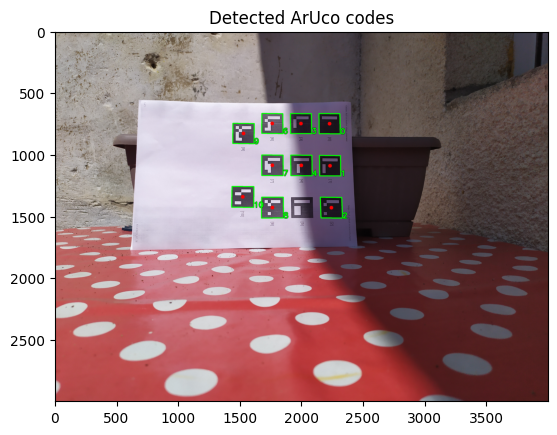

In [8]:
if is_aruco_detected:
  plt.title("Detected ArUco codes")
  plt.imshow(image_rgb)

X,Y = (2004, 1431)


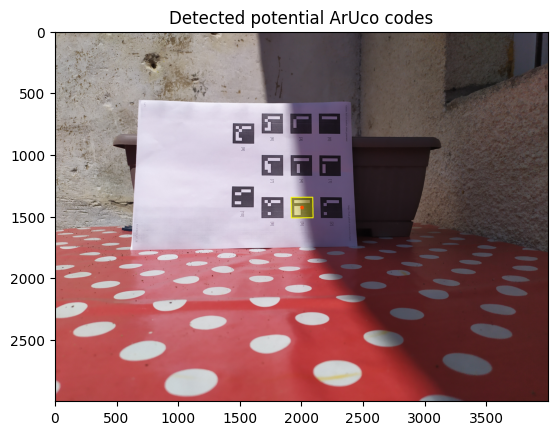

In [9]:
'''
  detect_potential_aruco_regions() will return only regions where CAN POTENTIAL ArUco code be
  It WILL NOT mark codes that can be detected and read by detect_aruco_in_photo() function
'''
list_regions_centers, ret_image = detect_potential_aruco_regions(image_path,
                                                                  min_area_size=400,
                                                                  max_aspect_ratio=1.2,
                                                                  min_perimeter_size=0.04)
# TODO: Dodati proveru koliko je povrsina deformisana,
# tipa da je to pravougaonik koji je nakoso ili je to trapez

plt.title("Detected potential ArUco codes")
plt.imshow(ret_image)

### Detect all codes from google drive folder

In [20]:
''' Run aruco detection algorithm on every photo from selecetd folder
'''
folder_path = '/content/drive/MyDrive/ERC/'
images_path = get_directory_image_names(folder_path)

for image_path in images_path:
  is_aruco_detected, code_name, dict_id_center, image_rgb = detect_aruco_in_photo(image_path = image_path,
                                                                                  show_output = False)

  if not is_aruco_detected:
    print(f"Code not detected on image with path: {image_path}")

Code not detected on image with path: /content/drive/MyDrive/ERC/IMG_20250614_104541 (1).jpg
Code not detected on image with path: /content/drive/MyDrive/ERC/IMG_20250614_104444.jpg
Code not detected on image with path: /content/drive/MyDrive/ERC/IMG_20250614_104526.jpg
Code not detected on image with path: /content/drive/MyDrive/ERC/IMG_20250614_104541.jpg
Code not detected on image with path: /content/drive/MyDrive/ERC/IMG_20250614_115028 (2).jpg
Code not detected on image with path: /content/drive/MyDrive/ERC/IMG_20250614_115028 (1).jpg
Code not detected on image with path: /content/drive/MyDrive/ERC/IMG_20250614_115028.jpg
Code not detected on image with path: /content/drive/MyDrive/ERC/1749894811486_.jpg
